# Crop Recommendation System

## 1. Introduction
This notebook implements a Machine Learning system to recommend the most suitable crop to grow based on various soil and climatic parameters. 

**Parameters:**
- **N**: Nitrogen content in soil
- **P**: Phosphorus content in soil
- **K**: Potassium content in soil
- **Temperature**: Temperature in degree Celsius
- **Humidity**: Relative humidity in %
- **pH**: pH value of the soil
- **Rainfall**: Rainfall in mm

**Target:**
- **Label**: Name of the crop

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## 2. Data Loading and Inspection

In [2]:
# Load the dataset
df = pd.read_csv('Crop_recommendation.csv')

# Display first 5 rows
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
# Check for missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
# Statistical summary
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


## 3. Exploratory Data Analysis (EDA)

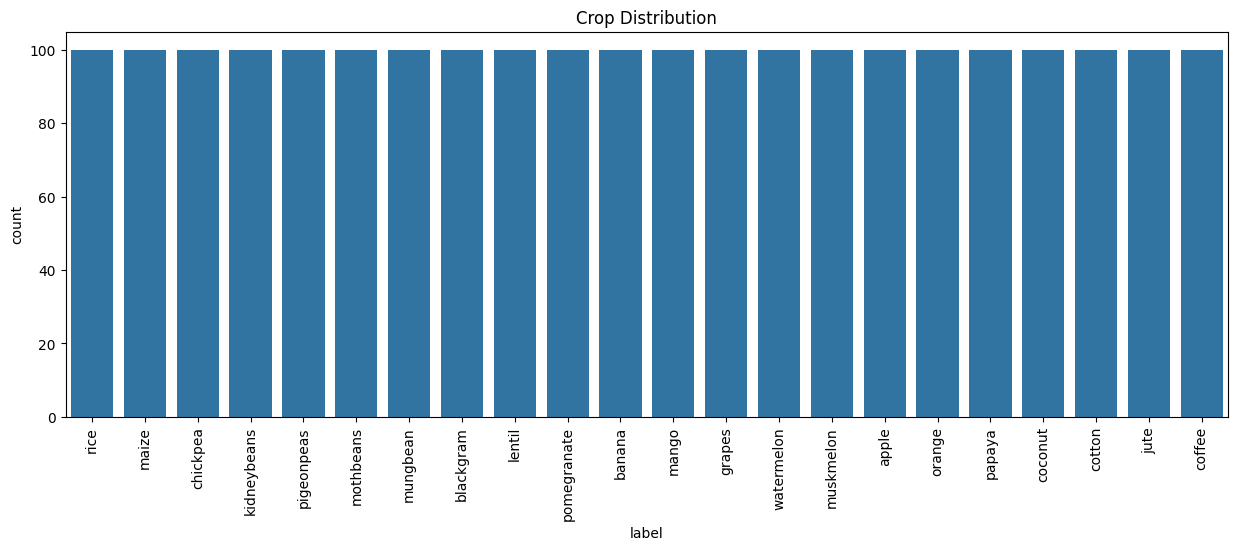

In [5]:
# Distribution of Target Variable
plt.figure(figsize=(15, 5))
sns.countplot(x='label', data=df)
plt.title('Crop Distribution')
plt.xticks(rotation=90)
plt.show()

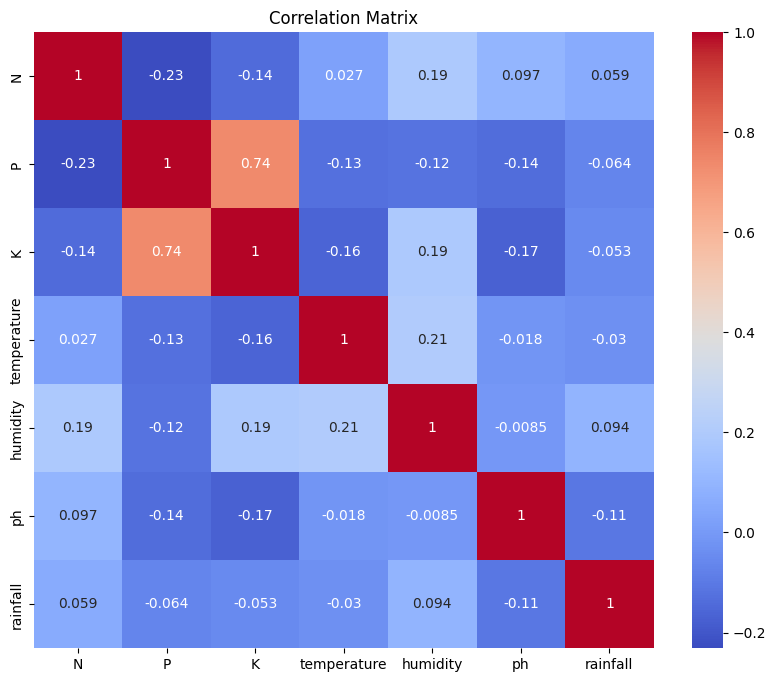

In [6]:
# Correlation Matrix
numeric_df = df.drop('label', axis=1)
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

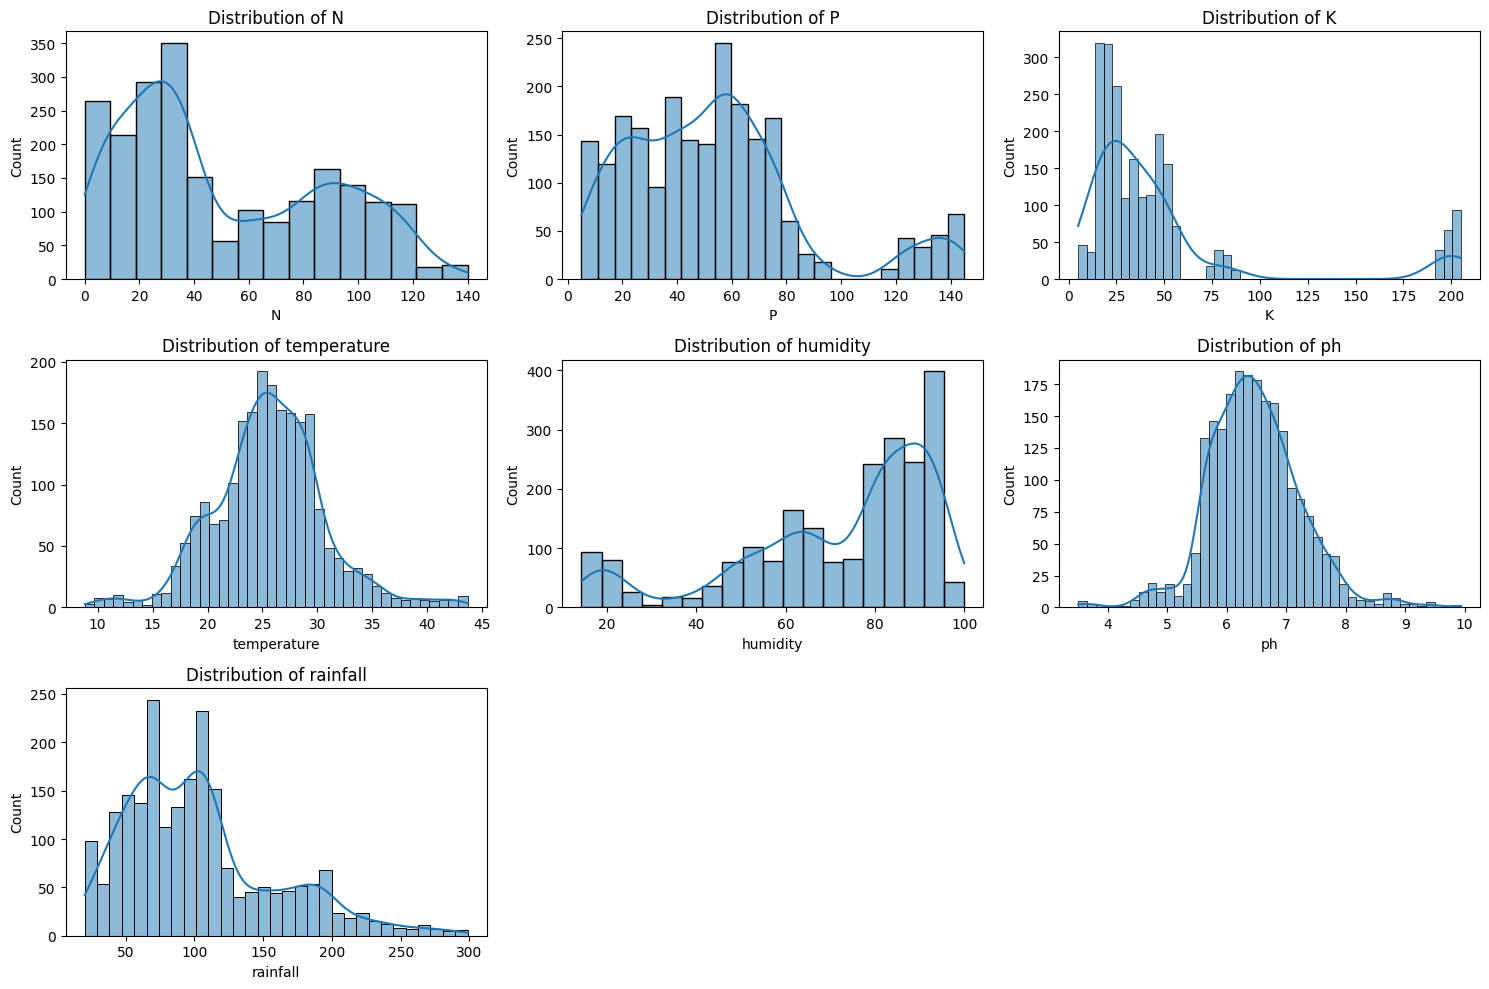

In [7]:
# Feature Distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_df.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

## 4. Data Preprocessing

In [8]:
X = df.drop('label', axis=1)
y = df['label']

# Split into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Shape: {X_train.shape}")
print(f"Testing Shape: {X_test.shape}")

Training Shape: (1760, 7)
Testing Shape: (440, 7)


## 5. Model Building

In [9]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}
best_model = None
best_acc = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc*100:.2f}%")
    
    if acc > best_acc:
        best_acc = acc
        best_model = model
        best_model_name = name

Logistic Regression Accuracy: 95.00%
Naive Bayes Accuracy: 99.55%
Random Forest Accuracy: 99.32%


## 6. Model Evaluation

In [10]:
print(f"Best Model: {best_model_name} with {best_acc*100:.2f}% accuracy")

# Detailed Report for Best Model
y_pred_best = best_model.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_best))

Best Model: Naive Bayes with 99.55% accuracy

Classification Report:

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orang

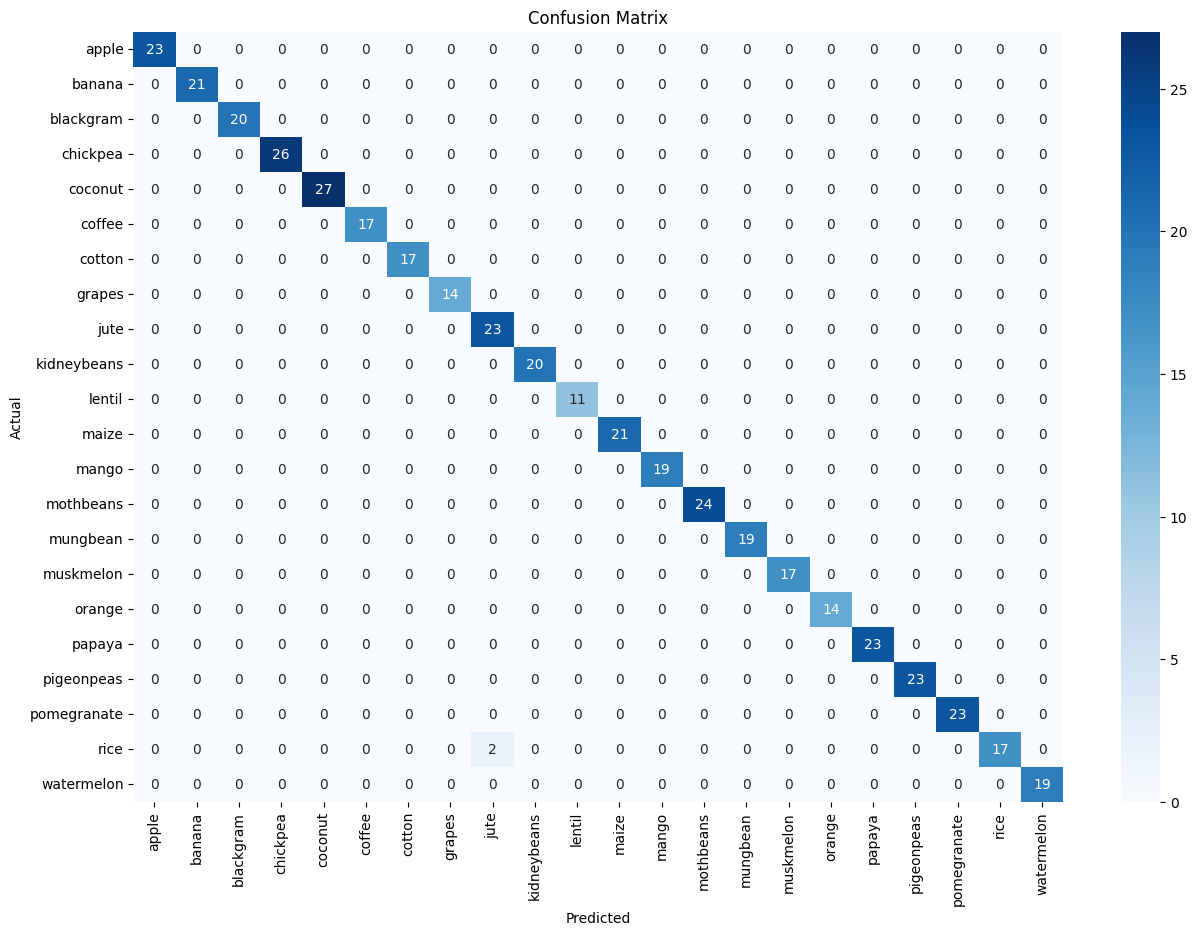

In [11]:
# Confusion Matrix
plt.figure(figsize=(15, 10))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 7. Prediction System
Use the best trained model to make predictions on new data.

In [12]:
def predict_crop(N, P, K, temperature, humidity, ph, rainfall):
    input_data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    prediction = best_model.predict(input_data)
    return prediction[0]

# Example Prediction
# Values: N=90, P=42, K=43, Temp=20.8, Hum=82, pH=6.5, Rain=202
example_crop = predict_crop(90, 42, 43, 20.8, 82.0, 6.5, 202.9)
print(f"Recommended Crop for example conditions: {example_crop}")

Recommended Crop for example conditions: rice


In [13]:
# Interactive Prediction (Optional - Uncomment to use)
# N = float(input("Enter Nitrogen (N): "))
# P = float(input("Enter Phosphorus (P): "))
# K = float(input("Enter Potassium (K): "))
# temp = float(input("Enter Temperature: "))
# hum = float(input("Enter Humidity: "))
# ph = float(input("Enter pH: "))
# rain = float(input("Enter Rainfall: "))

# print(f"Recommended Crop: {predict_crop(N, P, K, temp, hum, ph, rain)}")